# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [252]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


import os
#print(os.listdir("../input"))

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

##SEABORN STYLINNG
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)



pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
#test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train= pd.read_csv("/content/drive/My Drive/DSF-3Housing/train.csv") 
test = pd.read_csv("/content/drive/My Drive/DSF-3Housing/test.csv") 

externalData = pd.read_csv("/content/drive/My Drive/DSF-3Housing/external.csv")
print(" Train data :",train.shape)
print(" Test data :",test.shape)


##Backing up dataframe
train0=pd.DataFrame(train)
test0=pd.DataFrame(test)

##Drop Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
print(" Train data :",train.shape)
print(" Test data :",test.shape)



Mounted at /content/drive
 Train data : (1460, 81)
 Test data : (1459, 80)
 Train data : (1460, 80)
 Test data : (1459, 79)


## Part 1 - Pairwise Correlations

## Question1 : Features selected :
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##### LotFrontage: Linear feet of street connected to property
##### OverallQual: Overall material and finish quality
##### OverallCond: Overall condition rating
##### Fireplaces: Number of fireplaces
##### YearBuilt: Original construction date
##### TotalBsmtSF: Total square feet of basement area
##### FullBath: Full bathrooms above grade
##### MiscVal: Value of miscellaneous feature
##### Bedroom: Number of bedrooms above basement level
##### Kitchen: Number of kitchens
##### GarageArea: Size of garage in square feet
##### PoolArea: Pool area in square feet
##### YrSold: Year Sold
##### EnclosedPorch: Enclosed porch area in square feet
##### GrLivArea: Living Area



['SalePrice' 'OverallQual' 'OverallCond' 'LotFrontage' 'YearBuilt'
 'Fireplaces' 'TotalBsmtSF' 'FullBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'MiscVal' 'GarageArea' 'PoolArea' 'YrSold' 'EnclosedPorch' 'GrLivArea']


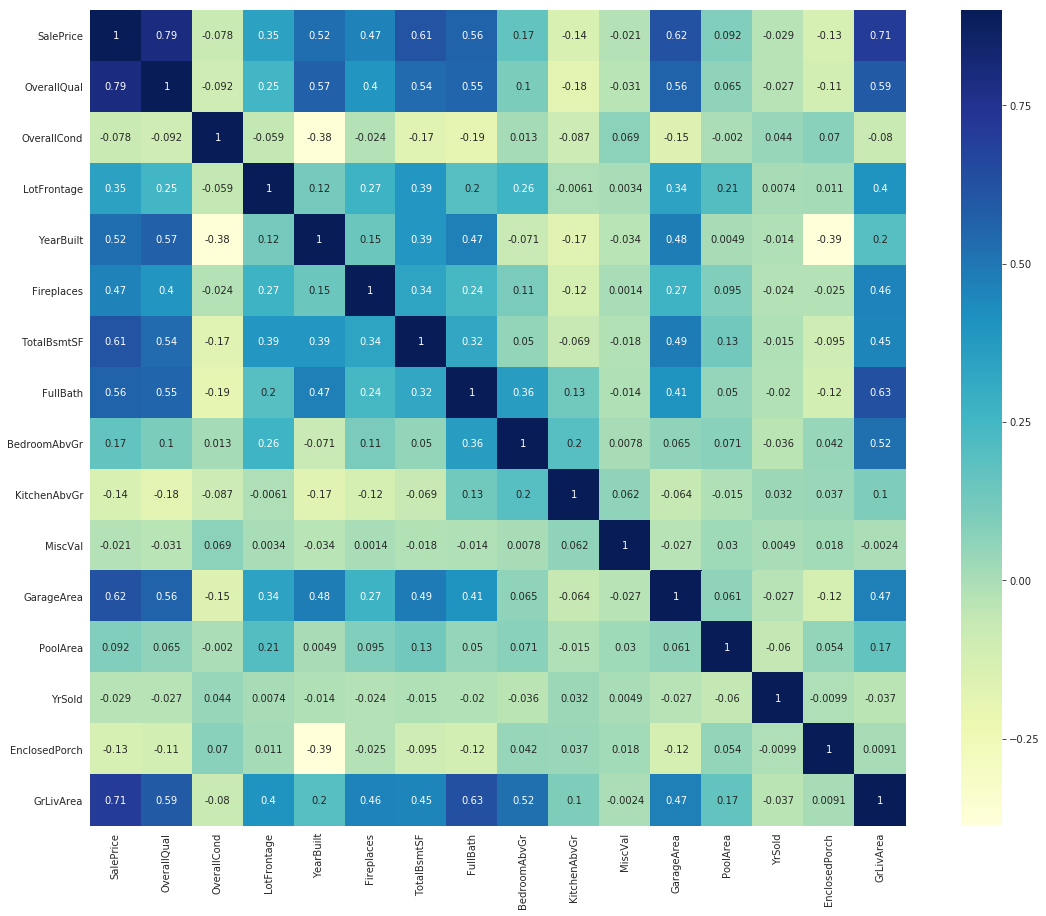

In [17]:
# TODO: show visualization


train.isna().any()


train_Q1 = train[['SalePrice','OverallQual', 'OverallCond','LotFrontage','YearBuilt', 'Fireplaces'  ,'TotalBsmtSF', 
                  'FullBath' , 'BedroomAbvGr' , 'KitchenAbvGr'  ,'MiscVal' 
                  , 'GarageArea' ,  'PoolArea' , 'YrSold'  , 'EnclosedPorch' , 'GrLivArea' ]]
##ain_Q1 = train.iloc[:,0:2] # Remember that Python does not slice inclusive of the ending index.
print(train_Q1.columns.values)
#Correlation map to see how features are correlated with SalePrice
corrmat = train_Q1.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=.9 , square=True, annot=True,  cmap="YlGnBu")






###Most  positive and negative correlations


####Positve Correlations: Correlation<-> Score 

##### SalePrice <->OverallQual  | 0.79
##### SalePrice <->FullBath     | 0.63
##### SalePrice <->BedroomAbvGr | 0.52
##### SalePrice<->GarageArea    | 0.47
##### SalePrice <-> GrLivArea   | 0.71
##### YearBuilt <-> GarageArea  | 0.48
##### FullBath<->GrLivArea      | 0.63
##### BedroomAbvGr<->GrLivArea  | 0.52


####Negative Correlations: Correlation<-> Score 

##### GarageArea <->OverallQual    | -0.15
##### OverallCond <->FullBath      | -0.19
##### YearBuilt <->OverallCond    | -0.38
##### EnclosedPorch<->GarageArea   | -0.12
##### YearBuilt <-> KitchAbvGr      | -0.17
##### YearBuilt <-> EnclosedPorch  | -0.39
##### OverallQual <->EnclosedPorch | -0.11
##### EnclosedPorch<->FullBath     | -0.12












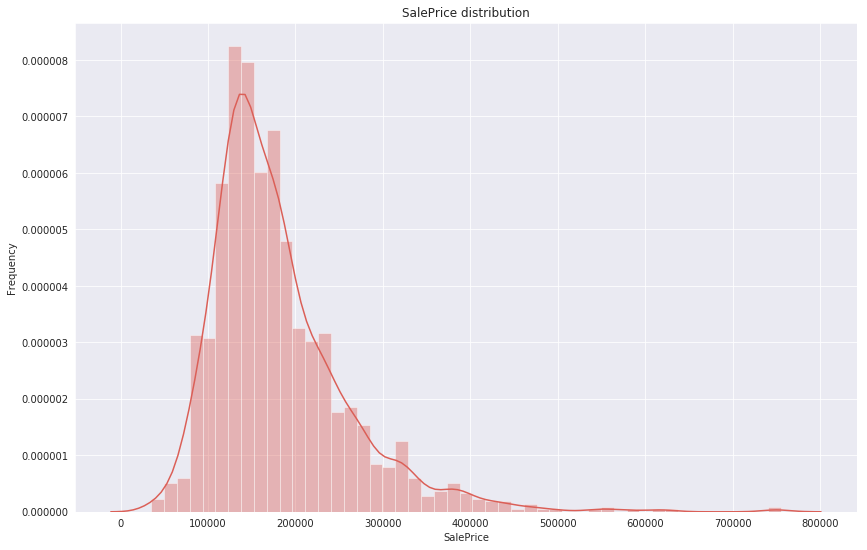

In [196]:
##SalePrice Distribution : 1
##Construct a Histogram for distribution of SalePrice

fig, ax = plt.subplots(figsize=(14, 9))
plt.ylabel('Frequency')

plt.title('SalePrice distribution')
sns.distplot(train['SalePrice'] );

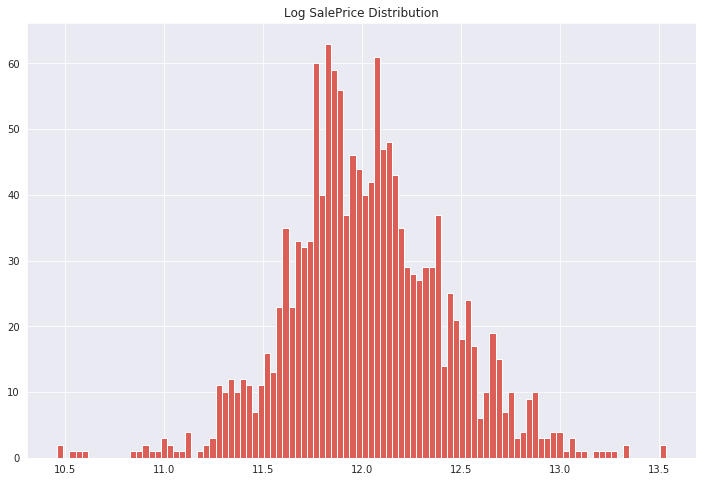

In [197]:
##Log the SalePrice
train_X=pd.DataFrame(train)
train_X["SalePriceLog"] = np.log1p(train_X["SalePrice"])
plt.title('Log SalePrice Distribution')
train_X.SalePriceLog.hist(bins = 100, figsize=(12,8))

## Part 2 - Informative Plots

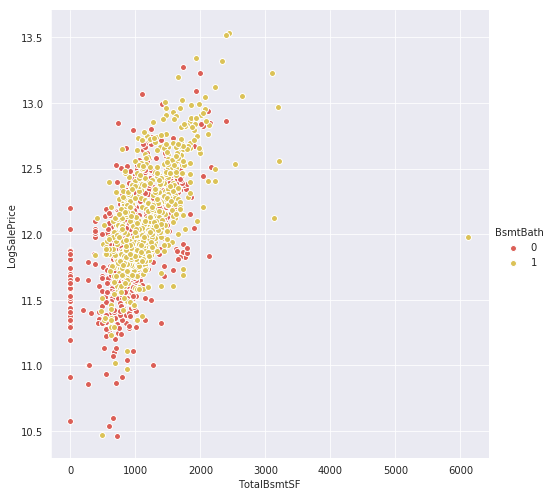

In [203]:
# TODO: code to generate Plot 1

df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])
df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])



df_train['BsmtBath'] = 0
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(0)
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(0)

df_train.loc[(df_train['BsmtFullBath'] > 0) | (df_train['BsmtHalfBath'] > 0), 'BsmtBath'] = 1

var = 'BsmtBath'
  
g = sns.FacetGrid(df_train, hue='BsmtBath', size = 7)
g.map(plt.scatter, 'TotalBsmtSF', 'LogSalePrice', edgecolor="w")
g.add_legend()


What interesting properties does Plot 1 reveal?



1.   We observe that high priced houses have basement bath, and most houses priced more than the average have basement bath
2.   Having Fullbath or HalfBath is same as having a bath in the basement , so we have clubbed their values to know that having any bath in basement affects the pricing.



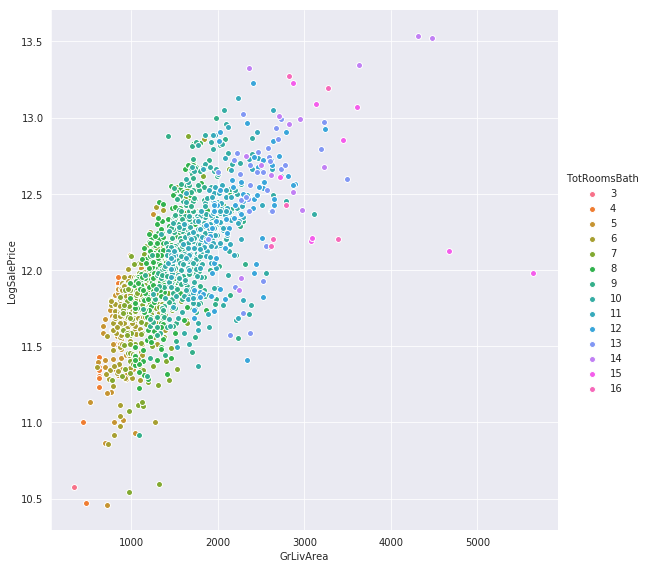

In [194]:
# TODO: code to generate Plot 2


#scatterplot
train.columns.values

df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])

df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])
##df_train.LogSalePrice.hist(bins = 100)



df_train['BedroomAbvGr'] = df_train['BedroomAbvGr'].fillna(0)
df_train['KitchenAbvGr'] = df_train['KitchenAbvGr'].fillna(0)
df_train['TotRmsAbvGrd'] = df_train['TotRmsAbvGrd'].fillna(0)
df_train['HalfBath'] = df_train['HalfBath'].fillna(0)
df_train['FullBath'] = df_train['FullBath'].fillna(0)


df_train['TotBath'] = df_train.FullBath + df_train.HalfBath
df_train['TotRoomsBath'] = df_train.TotRmsAbvGrd + df_train.TotBath



g = sns.FacetGrid(df_train, hue='TotRoomsBath', size = 8)
g.map(plt.scatter, 'GrLivArea', 'LogSalePrice', edgecolor="w")
g.add_legend()

#https://towardsdatascience.com/data-cleaning-and-feature-engineering-in-python-b4d448366022

What interesting properties does Plot 2 reveal?



1.   There is a linear relation between GrLivArea and the SaePrice of house except a few outliers
2.    Also we can observe that number of rooms and bath  increases as the SalePrice increases. Also the Toal LivingArea of the house combines all the spaces- Rooms+Bathrooms

3. Also observe that the total number of bathrooms+Rooms higher for higher priced houses. And the average number of rooms+bathrooms is 12.



In [0]:
# TODO: code to generate Plot 3




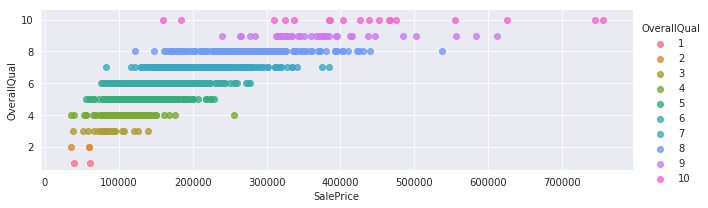

In [186]:
###sns.lmplot( x='SalePrice', y='OverallQual' , data=train,fit_reg=False, # No regression line   hue='OverallQual' , size=3, aspect=3)   # Color by OverallQual


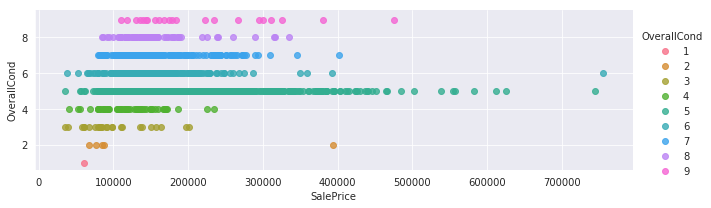

In [187]:
sns.lmplot( x='SalePrice', y='OverallCond' , data=train,fit_reg=False,    hue='OverallCond' , size=3, aspect=3)   # Color by OverallCond


What interesting properties does Plot 3 reveal?

1.   Overall quality of the house is  assigned a metric for from 1 to 10 , 10 being the highest value
2.   We observe that SalePrice of the house with high "Overall quality" value is also higher

3.   But this is not in the case of "OverAll Condition" values. SalePrice does not increase linearly with the increase in "OverAll Condition" value

(0, 22.004061775789268)

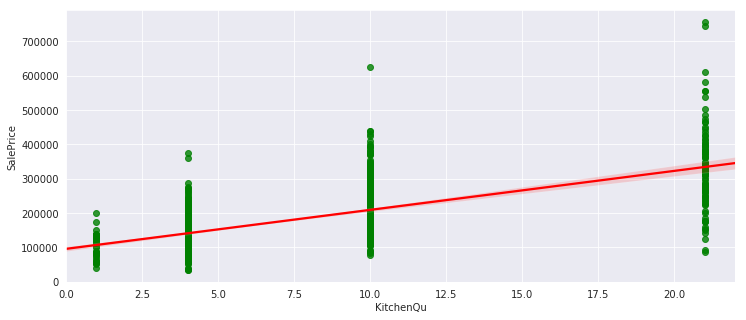

In [212]:
# TODO: code to generate Plot 4



df_train=pd.DataFrame(train)

df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])

df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])
##df_train.LogSalePrice.hist(bins = 100)


df_train['KitchenQual'] = df_train['KitchenQual'].fillna('None')


df_train.loc[df_train.KitchenQual == 'None', 'KitchenQu'] = 0
df_train.loc[df_train.KitchenQual == 'Fa', 'KitchenQu'] = 1
df_train.loc[df_train.KitchenQual == 'TA', 'KitchenQu'] = 4
df_train.loc[df_train.KitchenQual == 'Gd', 'KitchenQu'] = 10
df_train.loc[df_train.KitchenQual == 'Ex', 'KitchenQu'] = 21


## 3. Regplot
plt.figure(figsize=(12,5))##fig, ax =plt.subplots(1,2, figsize=(12,5))
sns.regplot(x='KitchenQu', y='SalePrice' , data=train,fit_reg=True, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.ylim(0, None)
plt.xlim(0, None)







What interesting properties does Plot 4 reveal?



1.  Quality of the Kitchen affects the Price of the house
2.  Price of the house linearly increases with the increase in KitchQuality. We have been given a metric for evalutaing the Kitchen Quality. So from the plot we see that any house in the Price range can  have high Kitchen Quality value range from lowest(0) to the highest value(20)



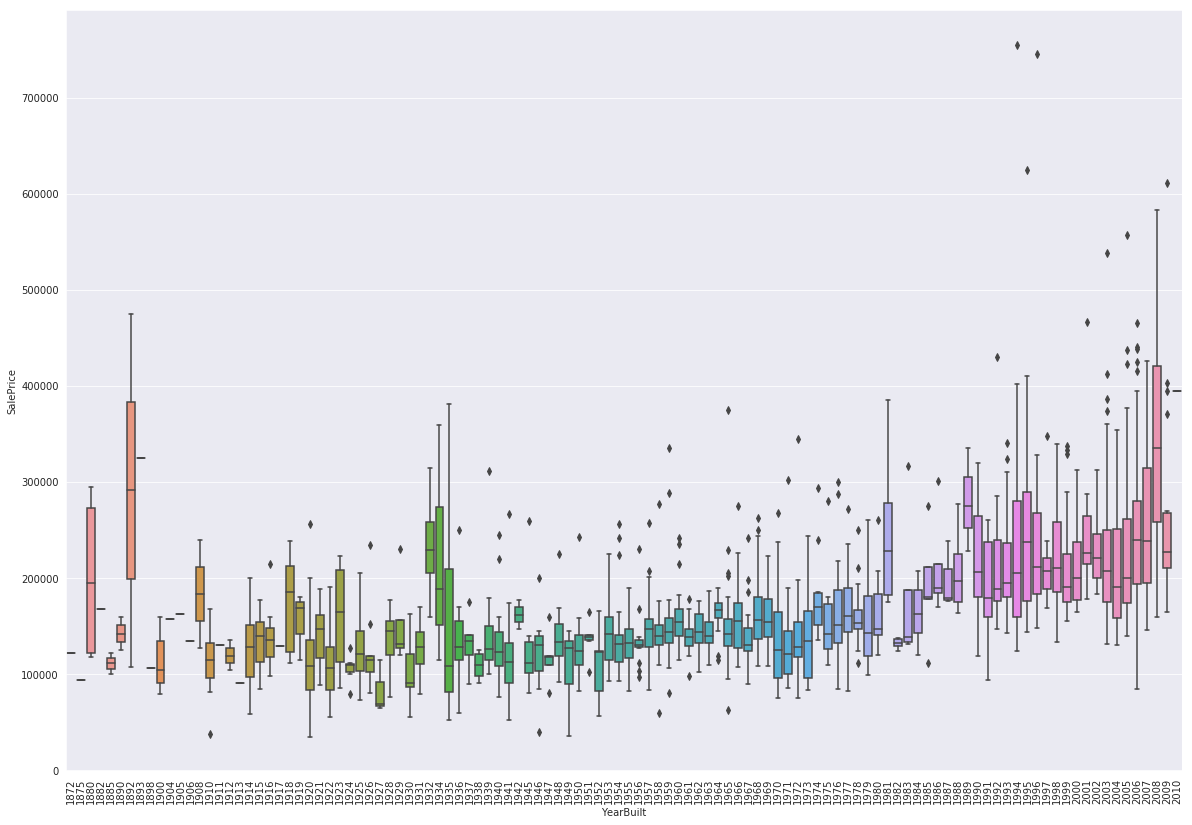

In [223]:
# TODO: code to generate Plot 5


df_train=pd.DataFrame(train)

## 4. Box Plot 

"""var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
"""


plt.figure(figsize=(20,14))


df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])
sns.boxplot(x='YearBuilt', y='SalePrice', data=train0)
##fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
# df2.plot.barh(stacked=True);







#### We see that the year in which the house is built affects pricing. The more recent the house is built , the house would be more priced.

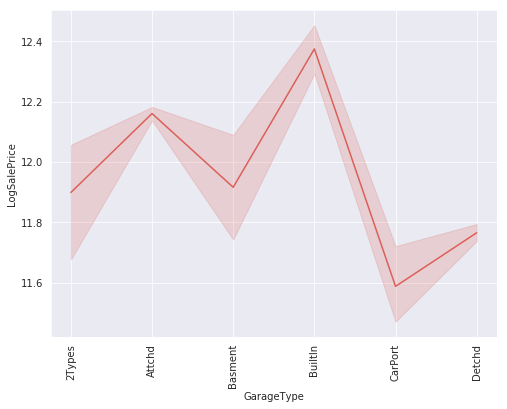

In [232]:
# overallqual/saleprice

df_train=pd.DataFrame(train)
df_train["LogSalePrice"] = np.log1p(df_train["SalePrice"])
#plt.figure(figsize=(20,14))


f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="GarageType", y="LogSalePrice", data=df_train)
plt.xticks(rotation=90);
#fig.axis(ymin=0, ymax=800000);

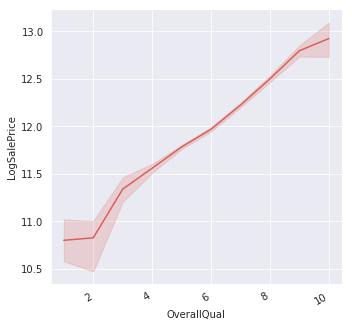

In [231]:
g = sns.relplot(x="OverallQual", y="LogSalePrice", kind="line", data=df_train)
g.fig.autofmt_xdate()

What interesting properties does Plot 5 reveal?

It shows linear relationship between OverallQual and LogSalePrice

## Part 3 - Handcrafted Scoring Function

In [234]:
# TODO: code for scoring function



####################################
##Combining train and Test data
####################################

train_1=pd.DataFrame(train0)
test_1=pd.DataFrame(test0)


##Drop Id column
train_1.drop("Id", axis = 1, inplace = True)
test_1.drop("Id", axis = 1, inplace = True)


# Dropping columns
train_1 = train_1[train_1.GrLivArea < 4000]
train_1.reset_index(drop=True, inplace=True)
dataY = train_1.SalePrice
train_1.drop("SalePrice", axis = 1, inplace = True)


print(" Train data after dropping columns :",train_1.shape)
print(" Test data after dropping columns:",test_1.shape)


traintest_2 = pd.concat((train_1, test_1)).reset_index(drop=True)
print("Traintest data shape",traintest_2.shape)


## Missing values to be handled in Encoded function below
### Step 1:[](http://) Identify the missing values columns
traintest_2_na = traintest_2.isnull().sum()
traintest_2_na = traintest_2_na[traintest_2_na>0]
traintest_2_na.sort_values(ascending=False)


cols=['PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu','LotFrontage','GarageFinish',
      'GarageQual','GarageCond', 'GarageType' , 'BsmtExposure', 'BsmtCond', 'BsmtQual',
      'BsmtFinType2', 'BsmtFinType1', 'BsmtFinType2' , 'MasVnrType' , 'MasVnrArea']


### Step 2: Identify the unique values in columns with most missing values[]
#for col in cols:
    #print(col, traintest_2[col].unique())
    

#### Observations:
###We observe that these columns : [BsmtCond ,BsmtQual ,GarageQual ,GarageCond ,FireplaceQu ,PoolQC  ] have a ranking for their values. So we convert null/Nan values of these to the ranking of 0 by giving it value=None .

####Also all the missing values columns , we would fill in None or 0 values for Nan.





 Train data after dropping columns : (1456, 79)
 Test data after dropping columns: (1459, 79)
Traintest data shape (2915, 79)


## Step 1. : Imputing values /Preprocessing
  

In [0]:

def DataCleaningEncoding(wholeDataX):
   
    
    dataX=pd.DataFrame(wholeDataX)


    ########################################################

    ##pd.concat((train, test)).reset_index(drop=True)
    #print("Before dataX size is :",dataX.shape)
    
    #print("dataX columns :",dataX.columns.values)
    
    ########################################################

    ##Filling missing values with None  as mentioned in the observation
    for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu' , 'GarageQual' , 'GarageFinish' , 'HeatingQC',
           'KitchenQual', 'GarageType' ,'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','ExterQual', 'ExterCond',
            'MasVnrType','FireplaceQu','GarageQual','BsmtFinSF1'):
        dataX[col] = dataX[col].fillna('None')
        
        
    dataX['BsmtFinSF2'] = dataX['BsmtFinSF2'].fillna(0.0)
    
    
    ##Filling missing values with 0
    cols=['GarageYrBlt','GarageArea','GarageCars','BsmtUnfSF',
                'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','LotArea','GarageYrBlt',
            'MasVnrArea','MSSubClass']
    for col in cols:
        dataX[col] = dataX[col].fillna(0)
    #print(dataX['BsmtFinType1'].unique())
    #print(dataX['BsmtFinType2'].unique())
      
           
    
    
    # Both columns have only one missing value. We will just substitute in the most common string
    cols = ['MSZoning','Exterior1st','Exterior2nd','SaleType','Electrical']
    for col in cols:
        dataX[col] = dataX[col].fillna(dataX[col].mode()[0])
    
    ##Custom
    ##Dropping Utilities as it has a lot of null values
    dataX = dataX.drop(['Utilities'], axis=1)

    dataX["Functional"] = dataX["Functional"].fillna("Typ")
    dataX["LotFrontage"] = dataX.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    # 'RL' is by far the most common value. So we can fill in missing values with 'RL'
    dataX['MSZoning'] = dataX.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    ########################################################
    ##remaining missing values
    for col in dataX.columns:
        dataX[col] = dataX[col].fillna('None')
    ##Changing the ranking to numeric metrics
    rank_dict = {None: 0, "0": 0, "None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    
    
    cols=['KitchenQual', 'GarageQual'  ,'FireplaceQu' ,'ExterQual', 'ExterCond' ,'BsmtQual' , 'BsmtCond',  
     'HeatingQC'  ,'GarageCond', 'PoolQC']
    
    
    dataX['GarageQual']=dataX['GarageQual'].map(rank_dict).astype(int)
    dataX['FireplaceQu']=dataX['FireplaceQu'].map(rank_dict).astype(int)
    dataX['ExterQual']=dataX['ExterQual'].map(rank_dict).astype(int)
    dataX['ExterCond']=dataX['ExterCond'].map(rank_dict).astype(int)
    dataX['BsmtQual']=dataX['BsmtQual'].map(rank_dict).astype(int)
    dataX['BsmtCond']=dataX['BsmtCond'].map(rank_dict).astype(int)
    dataX['HeatingQC']=dataX['HeatingQC'].map(rank_dict).astype(int)    
    dataX['GarageCond']=dataX['GarageCond'].map(rank_dict).astype(int)
    dataX['PoolQC']=dataX['PoolQC'].map(rank_dict).astype(int)
    
    

        

    
    dataX= dataX.drop(["BsmtFinType2"],axis=1)
    dataX= dataX.drop(["BsmtFinType1"] , axis=1)
    
    dataX= dataX.drop(['KitchenQual'] , axis=1)
    
    
    dataX["Functional"] = dataX["Functional"].map(
        {None: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

    dataX["GarageFinish"] = dataX["GarageFinish"].map(
        {None: 0, "None": 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

    dataX["Fence"] = dataX["Fence"].map({None: 0,  "None": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)
    
    
   
    ########################################################
    ##Step: 2 Label Encoding
    ########################################################
    ###label encoding
    
    labelencode = LabelEncoder()

    ##MSZoning
    dataX['MSZoning']=dataX['MSZoning'].fillna('RL', inplace=True)
    labelencode.fit(dataX['MSZoning'].unique())
    dataX['MSZoning'] = labelencode.transform(dataX['MSZoning'])
    ##Exterior1st
    dataX['Exterior1st']=dataX['Exterior1st'].fillna('Other', inplace=True)
    labelencode.fit(dataX['Exterior1st'].unique())
    dataX['Exterior1st'] = labelencode.transform(dataX['Exterior1st'])

    ##Exterior2nd
    dataX['Exterior2nd']=dataX['Exterior2nd'].fillna('Other', inplace=True)
    labelencode.fit(dataX['Exterior2nd'].unique())
    dataX['Exterior2nd'] = labelencode.transform(dataX['Exterior2nd'])
    ##"SaleType
    dataX['SaleType']=dataX['SaleType'].fillna('Other', inplace=True)
    labelencode.fit(dataX['SaleType'].unique())
    dataX['SaleType'] = labelencode.transform(dataX['SaleType'])
    ##MasVnrType
    dataX['MasVnrType']=dataX['MasVnrType'].fillna('N', inplace=True)
    labelencode.fit(dataX['MasVnrType'].unique())
    dataX['MasVnrType']= labelencode.transform(dataX['MasVnrType'])
  

    ##remaining missing values
    for col in dataX.columns:
        dataX[col] = dataX[col].fillna('None')
        
        
    ##print("Before encode",dataX.dtypes)
    ##'BsmtFinType2','BsmtFinType1',
   
        
    ##'BsmtFinSF2',
    
    cols=[     'Condition2','HouseStyle', 'RoofMatl', 'GarageType','Electrical', 'ExterQual', 'ExterCond','HeatingQC', 
           'PoolQC','MiscFeature','LandContour','Heating','BldgType','SaleCondition',  'Foundation' , 'RoofStyle',
           'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','Condition1','GarageQual','GarageCond', 'FireplaceQu',
          'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
          'Neighborhood', 'LotConfig' ]
    for col in cols:
        #labelencode = LabelEncoder() 
        labelencode.fit(dataX[col].unique())
        dataX[col] = labelencode.transform(dataX[col].values)

    
    
    
    ##Drop Features:
    dataX = dataX.drop(['MasVnrArea', 'OpenPorchSF',  'BsmtFinSF1','2ndFlrSF','BsmtFinSF2'], axis=1)
    
    

    
    
    scaler = StandardScaler()
    scaler.fit(dataX)

    scaled = scaler.transform(dataX)
    




    
    ##remaining missing values
    for col in dataX.columns:
        dataX[col] = dataX[col].fillna('None')
        
        
    #Check remaining missing values if any 
    dataX_na = (dataX.isnull().sum() / len(dataX)) * 100
    dataX_na = dataX_na.drop(dataX_na[dataX_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :dataX_na})
    #print(missing_data)
    
    ##print(dataX.dtypes)
    # shape     
    #print('Shape dataX: ',(dataX.shape))
    return dataX

 ## Step: 2 Label Encoding

In [237]:
dataY1 = pd.DataFrame(dataY)
dataX1=pd.DataFrame(traintest_2)



encodedData=DataCleaningEncoding(dataX1)


trainData = encodedData.iloc[:len(dataY1), :]
testData = encodedData.iloc[len(dataY1):, :]
print("test",testData.shape)
print("trainData",trainData.shape)
print("dataY1",dataY1.shape)

print("encodedData",encodedData.shape)

test (1459, 70)
trainData (1456, 70)
dataY1 (1456, 1)
encodedData (2915, 70)


## Scoring Function


For scoring function we consider the following columns for scoring:


1.   OverallQual
2.   TotalBsmtSF
3.   OverallQual
4.   FullBath
5.   GarageArea
6.   GrLivArea
7.   TotRmsAbvGrd
8.   Fireplaces
9.   WoodDeckSF
10.  YearBuilt



In [47]:
dataX3=pd.DataFrame(dataX1)
X3=pd.DataFrame(dataX1)
dataY3 = pd.DataFrame(dataY)



##DataFrame for scoring function
dataX3=dataX3[['OverallQual',
'TotalBsmtSF',
'OverallQual',
'FullBath',
'GarageArea',
'GrLivArea',
'TotRmsAbvGrd',
'Fireplaces',
'WoodDeckSF',
'YearBuilt']]


scoringColumns=['OverallQual',
'TotalBsmtSF',
'OverallQual',
'FullBath',
'GarageArea',
'GrLivArea',
'TotRmsAbvGrd',
'Fireplaces',
'WoodDeckSF',
'YearBuilt']


  





2915 10


Using the scoring columns , get the “desirability” of the houses

In [0]:



#Check remaining missing values if any 
#dataX3_na = (dataX3.isnull().sum() / len(dataX3)) * 100
#dataX3_na = dataX3_na.drop(dataX3_na[dataX3_na == 0].index).sort_values(ascending=False)
#missing_data = pd.DataFrame({'Missing Ratio' :dataX3_na})
#print(missing_data)


dataX3.head()
rows=dataX3.shape[0]
columns=dataX3.shape[1]
print(rows,columns)

rank=list()



##Calculate the scoringFunctionValue 
for row in range(rows):
  sum=0
  for col in range(columns):
    dataValue=dataX3.iloc[row][col]
    sum+=dataValue
    #print(row1)
  rank.append(sum)


After we have got the score for each ,we add the score at the end of the dataframe 



In [53]:
#print(rank)

rankdf=pd.DataFrame(rank)

rankdf.head()

X3["ScoringFunctionValue"]=rankdf
X3 = X3.sort_values(by ='ScoringFunctionValue', ascending=False )


##Change the order of the columns
cols = list(X3.columns)
cols = [cols[-1]] + cols[:-1]
X3 = X3[cols]


,ScoringFunctionValue,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1818,2954.000,30,C (all),72.000,9392,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.000,TA,Fa,CBlock,Fa,TA,No,Unf,0.000,Unf,0.000,245.000,245.000,GasA,TA,N,SBrkr,797,0,0,797,0.000,0.000,1,0,2,1,TA,5,Typ,0,None,None,0.000,None,0.000,0.000,None,None,N,0,36,94,0,0,0,None,None,None,0,9,2009,WD,Abnorml
708,2946.000,30,RL,56.000,4130,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,270.000,270.000,GasA,Gd,Y,SBrkr,729,0,0,729,0.000,0.000,1,0,2,1,TA,5,Maj2,0,None,None,0.000,None,0.000,0.000,None,None,N,0,0,0,0,0,0,None,None,None,0,7,2008,WD,Normal
2118,2934.000,30,RM,nan,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,6,1945,1995,Gable,CompShg,Plywood,Plywood,None,0.000,TA,Gd,CBlock,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,Gd,N,SBrkr,808,0,0,808,0.000,0.000,1,0,1,1,TA,6,Min2,0,None,Attchd,1925.000,Unf,1.000,164.000,TA,TA,P,0,48,0,0,0,0,None,None,None,0,6,2008,WD,Normal
1098,2902.000,30,RL,60.000,8400,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,CBlock,TA,Fa,No,Rec,290.000,Unf,0.000,0.000,290.000,GasA,TA,N,FuseF,438,0,0,438,0.000,0.000,1,0,1,1,Fa,3,Typ,0,None,Detchd,1930.000,Unf,1.000,246.000,TA,TA,N,0,0,0,0,0,0,None,None,None,0,1,2009,WD,Normal
1215,2871.000,50,RM,52.000,6240,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.000,TA,TA,Slab,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,Gd,N,SBrkr,672,240,0,912,0.000,0.000,1,0,2,1,TA,3,Typ,0,None,None,0.000,None,0.000,0.000,None,None,N,0,0,0,0,0,0,None,None,None,0,7,2006,WD,Normal
1810,2869.000,30,RM,50.000,5925,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,Gd,BrkTil,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,Fa,N,FuseA,612,0,0,612,0.000,0.000,1,0,1,1,TA,4,Typ,0,None,Detchd,1965.000,Unf,1.000,308.000,TA,Fa,N,0,0,25,0,0,0,None,None,None,0,10,2009,WD,Normal
1581,2837.000,30,RL,67.000,8777,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,Gd,CBlock,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,TA,N,SBrkr,640,0,0,640,0.000,0.000,1,0,2,1,TA,5,Min1,0,None,Detchd,1945.000,Unf,1.000,240.000,TA,TA,N,0,0,0,0,0,0,None,None,None,0,4,2010,ConLD,Normal
2887,2686.000,30,C (all),69.000,12366,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,Slab,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,TA,N,SBrkr,729,0,0,729,0.000,0.000,1,0,2,1,TA,5,Mod,0,None,None,0.000,None,0.000,0.000,None,None,N,0,0,23,0,0,0,None,None,None,0,10,2006,WD,Abnorml
1843,2617.000,20,RL,nan,9000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,Slab,None,None,None,None,0.000,None,0.000,0.0

What is the ten most desirable houses?

In [238]:
X3.head(10)

,ScoringFunctionValue,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2545,13937.000,20,RL,128.000,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.000,Unf,0.000,1085.000,5095.000,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.000,1.000,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.000,Fin,3.000,1154.000,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial
496,9260.000,20,RL,nan,12692,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.000,Gd,TA,PConc,Gd,TA,No,GLQ,1231.000,Unf,0.000,1969.000,3200.000,GasA,Ex,Y,SBrkr,3228,0,0,3228,1.000,0.000,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.000,RFn,2.000,546.000,TA,TA,Y,264,75,291,0,0,0,None,None,None,0,5,2007,WD,Normal
2678,9088.000,60,RL,114.000,17242,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.000,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.000,GLQ,1393.000,48.000,1733.000,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.000,0.000,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.000,RFn,3.000,959.000,TA,TA,Y,870,86,0,0,210,0,None,None,None,0,5,2006,WD,Normal
2818,8987.000,75,RL,60.000,19800,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2.5Unf,6,8,1935,1990,Gable,CompShg,BrkFace,Wd Sdng,None,0.000,TA,TA,BrkTil,TA,TA,No,Rec,425.000,Unf,0.000,1411.000,1836.000,GasA,Gd,Y,SBrkr,1836,1836,0,3672,0.000,0.000,3,1,5,1,Gd,7,Typ,2,Gd,Detchd,1993.000,Unf,2.000,836.000,TA,TA,Y,684,80,32,0,0,0,None,None,None,0,12,2006,WD,Normal
1475,8755.000,20,RL,110.000,14300,Pave,None,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373.000,Unf,0.000,1473.000,2846.000,GasA,Ex,Y,SBrkr,2696,0,0,2696,1.000,0.000,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,2003.000,Fin,3.000,958.000,TA,TA,Y,220,150,0,0,0,0,None,None,None,0,6,2010,WD,Normal
1167,8754.000,60,RL,118.000,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.000,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.000,Unf,0.000,543.000,1930.000,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1.000,0.000,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.000,Fin,3.000,807.000,TA,TA,Y,361,76,0,0,0,0,None,None,None,0,7,2006,WD,Normal
1659,8465.000,20,RL,105.000,13693,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.000,Unf,0.000,342.000,2630.000,GasA,Ex,Y,SBrkr,2674,0,0,2674,2.000,0.000,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2007.000,Fin,3.000,762.000,TA,TA,Y,360,50,0,0,0,0,None,None,None,0,3,2009,WD,Normal
1369,8417.000,20,RL,nan,11400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282.000,Unf,0.000,1351.000,2633.000,GasA,Ex,Y,SBrkr,2633,0,0,2633,1.000,0.000,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.000,RFn,3.000,804.000,TA,TA,Y,314,140,0,0,0,0,None,None,None,0,3,2007,WD,Normal
2749,8398.000,190,RL,94.000,22136,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,2fmCon,1.5Fin,5,5,1925,1975,Ga

What is the ten least desirable houses?

In [239]:
X3.tail(10)

,ScoringFunctionValue,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1818,2954.000,30,C (all),72.000,9392,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.000,TA,Fa,CBlock,Fa,TA,No,Unf,0.000,Unf,0.000,245.000,245.000,GasA,TA,N,SBrkr,797,0,0,797,0.000,0.000,1,0,2,1,TA,5,Typ,0,None,None,0.000,None,0.000,0.000,None,None,N,0,36,94,0,0,0,None,None,None,0,9,2009,WD,Abnorml
708,2946.000,30,RL,56.000,4130,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,270.000,270.000,GasA,Gd,Y,SBrkr,729,0,0,729,0.000,0.000,1,0,2,1,TA,5,Maj2,0,None,None,0.000,None,0.000,0.000,None,None,N,0,0,0,0,0,0,None,None,None,0,7,2008,WD,Normal
2118,2934.000,30,RM,nan,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,6,1945,1995,Gable,CompShg,Plywood,Plywood,None,0.000,TA,Gd,CBlock,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,Gd,N,SBrkr,808,0,0,808,0.000,0.000,1,0,1,1,TA,6,Min2,0,None,Attchd,1925.000,Unf,1.000,164.000,TA,TA,P,0,48,0,0,0,0,None,None,None,0,6,2008,WD,Normal
1098,2902.000,30,RL,60.000,8400,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,CBlock,TA,Fa,No,Rec,290.000,Unf,0.000,0.000,290.000,GasA,TA,N,FuseF,438,0,0,438,0.000,0.000,1,0,1,1,Fa,3,Typ,0,None,Detchd,1930.000,Unf,1.000,246.000,TA,TA,N,0,0,0,0,0,0,None,None,None,0,1,2009,WD,Normal
1215,2871.000,50,RM,52.000,6240,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.000,TA,TA,Slab,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,Gd,N,SBrkr,672,240,0,912,0.000,0.000,1,0,2,1,TA,3,Typ,0,None,None,0.000,None,0.000,0.000,None,None,N,0,0,0,0,0,0,None,None,None,0,7,2006,WD,Normal
1810,2869.000,30,RM,50.000,5925,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,Gd,BrkTil,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,Fa,N,FuseA,612,0,0,612,0.000,0.000,1,0,1,1,TA,4,Typ,0,None,Detchd,1965.000,Unf,1.000,308.000,TA,Fa,N,0,0,25,0,0,0,None,None,None,0,10,2009,WD,Normal
1581,2837.000,30,RL,67.000,8777,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,Gd,CBlock,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,TA,N,SBrkr,640,0,0,640,0.000,0.000,1,0,2,1,TA,5,Min1,0,None,Detchd,1945.000,Unf,1.000,240.000,TA,TA,N,0,0,0,0,0,0,None,None,None,0,4,2010,ConLD,Normal
2887,2686.000,30,C (all),69.000,12366,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,Slab,None,None,None,None,0.000,None,0.000,0.000,0.000,GasA,TA,N,SBrkr,729,0,0,729,0.000,0.000,1,0,2,1,TA,5,Mod,0,None,None,0.000,None,0.000,0.000,None,None,N,0,0,23,0,0,0,None,None,None,0,10,2006,WD,Abnorml
1843,2617.000,20,RL,nan,9000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,Slab,None,None,None,None,0.000,None,0.000,0.0

Describe your scoring function and how well you think it worked.

Selected these columns which attribute more to the SalePrice of the houses. Encoded these columns so that an equation can be formed which returns the scoringFucntionValue for that house.
1.   OverallQual
2.   TotalBsmtSF
3.   OverallQual
4.   FullBath
5.   GarageArea
6.   GrLivArea
7.   TotRmsAbvGrd
8.   Fireplaces
9.   WoodDeckSF
10.  YearBuilt

## Part 4 - Pairwise Distance Function

### Step 1
We want the scoring function to based upon the columns which describe the layout and size of the houses. So we select these columns to get a better pairWise distance function. Example if there were 2 room houses and 3 room houses , distance between same-number-of-room houses should be less than different-number-of-room houses.

In [180]:
# TODO: code for distance function

from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist
train_Q4=pd.DataFrame(dataX1)
X4=pd.DataFrame(dataX1)
dataY4 = pd.DataFrame(dataY)


encodedData=DataCleaningEncoding(train_Q4)


trainData = encodedData.iloc[:len(dataY4), :]
testData = encodedData.iloc[len(dataY4):, :]
print("test",testData.shape)
print("trainData",trainData.shape)
print("dataY4",dataY4.shape)

print("encodedData",encodedData.shape)

train_Q4=pd.DataFrame(trainData)


columns=['OverallQual',
'TotalBsmtSF',
'OverallQual',
'FullBath',
'GarageArea',
'GrLivArea',
'TotRmsAbvGrd',
'Fireplaces',
'WoodDeckSF',
'YearBuilt']

pairwiseDistFunctionDf=train_Q4[['OverallQual','TotalBsmtSF','OverallQual','FullBath','GarageArea','GrLivArea','TotRmsAbvGrd','Fireplaces','WoodDeckSF','YearBuilt']]


pairwiseDist=euclidean_distances(pairwiseDistFunctionDf, pairwiseDistFunctionDf)
#print(pd.DataFrame(pairwiseDist))


Empty DataFrame
Columns: [Missing Ratio]
Index: []
Shape dataX:  (2915, 71)
test (1459, 71)
trainData (1456, 71)
dataY4 (1456, 1)
encodedData (2915, 71)


How well does the distance function work? When does it do well/badly?

The distance function works well when correlated columns are chosen for finding the distance. f we select attributes that constribute less towards the SalePrice , the distance function does not work well. It gives larger distance for the houses which are much similar if we include them.

So following columns give a good distance function.


1.   OverallQual
2.   TotalBsmtSF
3.   OverallQual
4.   FullBath
5.   GarageArea
6.   GrLivArea
7.   TotRmsAbvGrd
8.   Fireplaces
9.   WoodDeckSF
10.  YearBuilt

## Part 5 - Clustering

[0 0 0 ... 0 0 0]


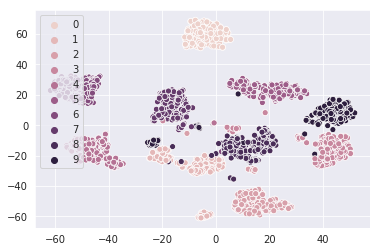

In [240]:
# TODO: code for clustering and visualization

import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE



train_Q5=pd.DataFrame(dataX1)
X5=pd.DataFrame(dataX1)
dataY5 = pd.DataFrame(dataY)


encodedData=DataCleaningEncoding(train_Q5)


trainData = encodedData.iloc[:len(dataY5), :]
testData = encodedData.iloc[len(dataY5):, :]
#print("test",testData.shape)  #print("trainData",trainData.shape)  #print("dataY5",dataY5.shape)  #print("encodedData",encodedData.shape)
train_Q5=pd.DataFrame(trainData)
data=train_Q5##.values

clustering= AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
clustering.fit(data)

print(clustering.labels_)
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
#data_scaled=pd.DataFrame(data_scaled)


X, y = load_digits(return_X_y=True)
tsne = TSNE()
X_embedded = tsne.fit_transform(X)



##As we can see, the model managed to take a 64-dimensional dataset and project it on to a 2-dimensional space in such a way that similar samples cluster together.


palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')




How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

Clusters clearly attribute the Neighbourhood boundaries as seen in the plot. The clusters is formed on the similarity on the most highly ranked columns and any similarity in their data , all those houses are clubbed together.

## Part 6 - Linear Regression

Empty DataFrame
Columns: [Missing Ratio]
Index: []
Shape dataX:  (2915, 71)


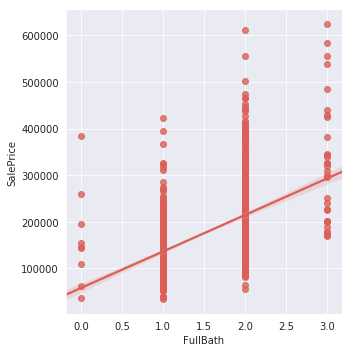

In [178]:
# TODO: code for linear regression
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



train_Q6=pd.DataFrame(dataX1)
X6=pd.DataFrame(dataX1)
dataY6 = pd.DataFrame(dataY)
encodedData=DataCleaningEncoding(train_Q6)
trainData = encodedData.iloc[:len(dataY6), :]
testData = encodedData.iloc[len(dataY6):, :]


####columns for linear regression
columns=['OverallQual','TotalBsmtSF','OverallQual','FullBath','GarageArea','GrLivArea','TotRmsAbvGrd',
'Fireplaces','YearBuilt']


X=trainData[['OverallQual','TotalBsmtSF','OverallQual','FullBath','GarageArea','GrLivArea','TotRmsAbvGrd',
'Fireplaces','YearBuilt']]

Xplot1=trainData[['OverallQual','TotalBsmtSF','OverallQual','FullBath','GarageArea','GrLivArea','TotRmsAbvGrd',
'Fireplaces','YearBuilt']]
Xplot1["SalePrice"]=dataY6[["SalePrice"]]
sns.lmplot(x='FullBath', y='SalePrice', data=Xplot1)




[-836308.81001022]
[[ 8621.31102994    37.29511908  8621.31102993 -6127.63148473
     44.2095773     59.0967969   -303.56916061  7582.41934704
    390.14213802]]


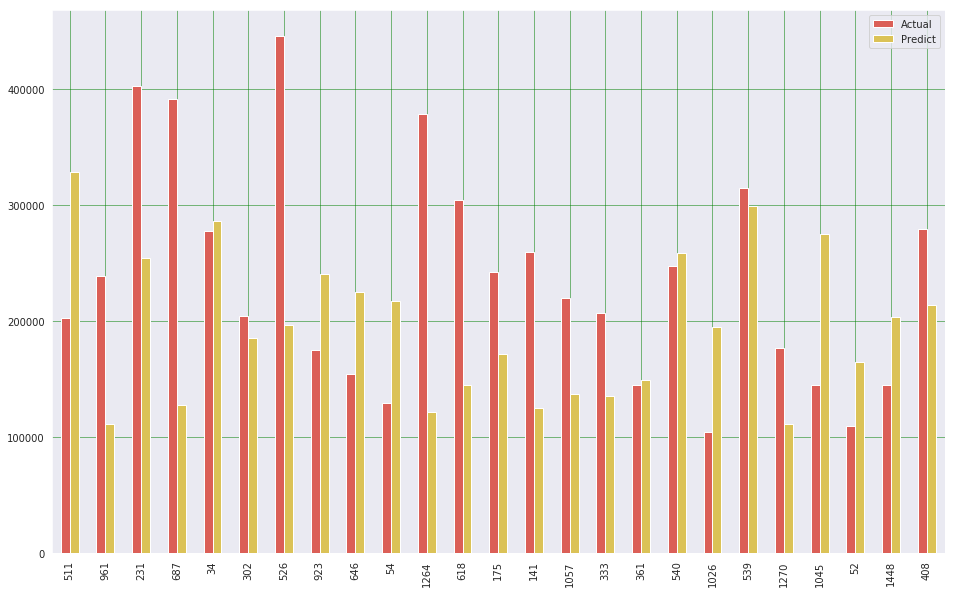

In [179]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


regressor = LinearRegression()  


X_train, X_test, y_train, y_test = train_test_split(X, dataY6, test_size=0.2, random_state=0)


regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
X_test=testData[['OverallQual','TotalBsmtSF','OverallQual','FullBath','GarageArea','GrLivArea','TotRmsAbvGrd',
'Fireplaces','YearBuilt']]
y_pred = regressor.predict(X_test)

df=pd.DataFrame()

df["Actual"] =  y_test["SalePrice"]
df["Predict"] =  pd.DataFrame(y_pred)

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [248]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df["Actual"], df["Predict"]))  
print('Mean Squared Error:', metrics.mean_squared_error(df["Actual"], df["Predict"]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df["Actual"], df["Predict"]) ))



Mean Absolute Error: 79544.54726169552
Mean Squared Error: 10607436615.848024
Root Mean Squared Error: 102992.41047692798


How well/badly does it work? Which are the most important variables?

Our algorithm considered the following columns 
1. 'OverallQual'
2. 'TotalBsmtSF'
3. 'OverallQual'
4. 'FullBath' 
5. 'GarageArea'
6. 'GrLivArea' 
7. 'TotRmsAbvGrd',
8. 'Fireplaces'
9.  'YearBuilt'


This means that our algorithm was not very accurate but can still make reasonably good predictions.

## Part 7 - External Dataset

In [267]:
# TODO: code to import external dataset and test



externalData.head()
externalData.isna().any()


column1=pd.DataFrame()
column1=externalData[['taxvaluedollarcnt']]
column1['taxvaluedollarcnt'] = column1['taxvaluedollarcnt'].fillna(0)


print(column1.shape)



train_Q6=pd.DataFrame(dataX1)
X6=pd.DataFrame(dataX1)
dataY6 = pd.DataFrame(dataY)
print(train_Q6.shape)

encodedData=DataCleaningEncoding(train_Q6)
column1SelectedTrain=column1.iloc[:len(dataY6), :]



print(column1SelectedTrain.shape)

trainData = encodedData.iloc[:len(dataY6), :]
testData = encodedData.iloc[len(dataY6):, :]


column1SelectedTest=column1.iloc[:len(testData), :]
print(column1SelectedTest.shape)


##Adding external dataset
trainData["taxvaluedollarcnt"]=pd.DataFrame(column1SelectedTrain)
trainData.head()

testData["taxvaluedollarcnt"]=pd.DataFrame(column1SelectedTest)
testData.head()




(2491, 1)
(2915, 79)
(1456, 1)
(1459, 1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,taxvaluedollarcnt
1456,0,0,80.000,11622,1,1,3,3,4,0,12,1,2,0,2,5,5,1961,1961,1,0,0,0,0,1,2,1,3,3,3,270.000,882.000,1,2,1,4,896,0,896,0.000,0.000,1,0,2,1,5,6,0,0,1,1961.000,1,1.000,730.000,3,3,2,140,0,0,120,0,0,3,1,0,5,4,0,4,391643.000
1457,0,0,81.000,14267,1,1,0,3,0,0,12,2,2,0,2,6,5,1958,1958,3,0,0,0,0,1,2,1,3,3,3,406.000,1329.000,1,2,1,4,1329,0,1329,0.000,0.000,1,1,3,1,6,6,0,0,1,1958.000,1,1.000,312.000,3,3,2,393,0,0,0,0,0,0,0,12500,5,4,0,4,435457.000
1458,5,0,74.000,13830,1,1,0,3,4,0,8,2,2,0,5,5,4,1997,1998,1,0,0,0,0,1,2,2,4,3,3,137.000,928.000,1,3,1,4,928,0,1629,0.000,0.000,2,1,3,1,6,6,1,3,1,1997.000,3,2.000,482.000,3,3,2,212,0,0,0,0,0,3,1,0,2,4,0,4,232596.000
1459,5,0,78.000,9978,1,1,0,3,4,0,8,2,2,0,5,6,5,1998,1998,1,0,0,0,0,1,2,2,3,3,3,324.000,926.000,1,4,1,4,926,0,1604,0.000,0.000,2,1,3,1,7,6,1,4,1,1998.000,3,2.000,470.000,3,3,2,360,0,0,0,0,0,0,1,0,5,4,0,4,nan
1460,11,0,43.000,5005,1,1,0,1,4,0,22,2,2,4,2,8,4,1992,1992,1,0,0,0,0,2,2,2,4,3,3,1017.000,1280.000,1,4,1,4,1280,0,1280,0.000,0.000,2,0,2,1,5,6,0,0,1,1992.000,2,2.000,506.000,3,3,2,0,0,0,144,0,0,0,1,0,0,4,0,4,nan


In [270]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

##Define a cross validation strategy
###Validation function
#"""
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(trainData.values)
    rmse= np.sqrt(-cross_val_score(model, trainData.values, dataY6, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)  #"""
  
  
  
  






GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ,score)


Gradient Boosting score: 22640.9354 (1917.4683)
 [21704.44435388 23858.22812401 23731.13616916 19319.50520034
 24591.36334436]


Describe the dataset and whether this data helps with prediction.

I used  a dataset on the housing prices to get the "taxvaluedollarcnt". The tax rate for house linearly affects the housing prices. More the tax, more would be the rate of the house. Using this column , I ran the model to see the mean squared error , and it actually reduced the error. For Gradient Boosting , it was Gradient Boosting score: 22502.1931 (2156.0775) with original data which went down to  Gradient Boosting score: 22640.9354 (1917.4683).

## Part 8 - Permutation Test

In [246]:
# TODO: code for all permutation tests



from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

dataY8 = pd.DataFrame(dataY)
dataX8=pd.DataFrame(traintest_2)

encodedData=DataCleaningEncoding(dataX1)


trainData8 = encodedData.iloc[:len(dataY8), :]
testData8 = encodedData.iloc[len(dataY8):, :]


cols=['LotFrontage','YrSold'  ,'EnclosedPorch', 'FullBath' , 'TotalBsmtSF', 'YearBuilt','Fireplaces' , 
      'Condition1' , 'Exterior1st' , 'BsmtFullBath' ]
newDataX=pd.DataFrame()


for col in cols:
    trainColX=pd.DataFrame(trainData8[col])
    testColX=pd.DataFrame(testData8[col])
    # Create linear regression object
    linear_regr = linear_model.LinearRegression()
    # Train the model using the training sets
    linear_regr.fit(trainColX, dataY8)
    
    # Make predictions using the testing set
    y_pred = linear_regr.predict(testColX)
    
    score, permutation_scores, pvalue = permutation_test_score(linear_regr, trainColX, dataY8, cv=2, n_permutations=120)
    predY=linear_regr.predict(trainColX)
    
    print('Root-mean-squared Error of the Log(SalePrice) for Column : ',col," : ", np.sqrt(metrics.mean_squared_log_error(dataY8, predY)))
    print('P-value for Column : ',col," : ",pvalue )
    
    

Root-mean-squared Error of the Log(SalePrice) for Column :  LotFrontage  :  0.3746480252101541
P-value for Column :  LotFrontage  :  0.008264462809917356
Root-mean-squared Error of the Log(SalePrice) for Column :  YrSold  :  0.4036412753499791
P-value for Column :  YrSold  :  0.9090909090909091
Root-mean-squared Error of the Log(SalePrice) for Column :  EnclosedPorch  :  0.3997828901926548
P-value for Column :  EnclosedPorch  :  0.008264462809917356
Root-mean-squared Error of the Log(SalePrice) for Column :  FullBath  :  0.32896715515846786
P-value for Column :  FullBath  :  0.008264462809917356
Root-mean-squared Error of the Log(SalePrice) for Column :  TotalBsmtSF  :  0.3260794686890968
P-value for Column :  TotalBsmtSF  :  0.008264462809917356
Root-mean-squared Error of the Log(SalePrice) for Column :  YearBuilt  :  0.3407702001914169
P-value for Column :  YearBuilt  :  0.008264462809917356
Root-mean-squared Error of the Log(SalePrice) for Column :  Fireplaces  :  0.3482557974217012

Describe the results.

Randomly selected variables gave lower probability of occurrence than these variables. Depending on the correlation with SalePrice , we picked up these colummns for permutation test.


## Part 9 - Final Result

In [181]:

########################################################
##Step: 3 Modelling
########################################################
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

##Define a cross validation strategy
###Validation function
#"""
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(trainData.values)
    rmse= np.sqrt(-cross_val_score(model, trainData.values, dataY1, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)  #"""
  
  
  
  

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ,score)

model = lasso.fit(trainData, dataY1)
submitPredict_lasso=model.predict(testData)
print("testdata",testData.shape)

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()),score)
model = ENet.fit(trainData, dataY1)
submitPredict_enet=model.predict(testData)


#"""
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ,score)

model = GBoost.fit(trainData, dataY1)
submitPredict_gboost=model.predict(testData)#"""

submitPredict_lasso=pd.DataFrame(submitPredict_lasso)
submitPredict_lasso.to_csv("submitPredict_lasso.csv", index = "True")


submitPredict_gboost=pd.DataFrame(submitPredict_gboost)
submitPredict_gboost.to_csv("submitPredict_gboost.csv", index = True)

submitPredict_enet=pd.DataFrame(submitPredict_enet)
submitPredict_enet.to_csv("submitPredict_enet.csv", index = "True")

a1=submitPredict_enet


a1['Id'] = range(1, len(a1) + 1)
a1.to_csv("a1.csv", index = "False")




Lasso score: 27826.4437 (1497.8703)
 [27562.26596648 25373.03944072 29027.23702812 27458.59069698
 29711.08552904]
testdata (1459, 71)
ElasticNet score: 27801.4137 (1499.4474)
 [27447.94844167 25375.39895067 29019.98693725 27457.56946101
 29706.16494445]
Gradient Boosting score: 22502.1931 (2156.0775)
 [21758.36820591 24125.49683498 23661.29303226 18599.02216718
 24366.78531735]


In [0]:
from google.colab import files

#a1.to_csv("a1.csv", index = "True")
submitPredict_enet.to_csv("submitPredict_enet.csv", index = False)
files.download('submitPredict_enet.csv')





Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

In [0]:
submitPredict_gboost.to_csv("submitPredict_gboost.csv", index = True)
files.download('submitPredict_gboost.csv')


In [0]:
submitPredict_lasso.to_csv("submitPredict_lasso.csv", index = "True")
files.download('submitPredict_lasso.csv')

Kaggle Link: [https://www.kaggle.com/aveenakott](https://)

Highest Rank: 908

Score: 0.1195

Number of entries: 4

INCLUDE IMAGE OF YOUR KAGGLE RANKING![](https://)